# Vamos a importar las librerías a usar

In [ ]:
import pandas as pd #Para trabajar con los datos
import matplotlib.pyplot as plt #Para hacer representaciones gráficas
csv_file_path='nba_juego_a_juego.csv'#Porque lo tenemos fuera del todo, si no habría que poner la carpeta y todo donde lo tengamos guardado
df=pd.read_csv(csv_file_path)#Vamos a hacer una lectura del archivo con pandas para tenerlo en forma de dataframe y trabjar con ellos como datos
df.head() #Para ver que lo ha hecho ien mosttramos las primeras filas

,Año,Tabla 1,Tabla 2,Tabla 3,Tabla 4,Tabla 5,Tabla 6,Tabla 7,Tabla 8,Tabla 9,Tabla 10,Tabla 11,Tabla 12,Tabla 13,Tabla 14,Tabla 15,Tabla 16,Tabla 17,Tabla 18
0,2021,Dom. 16/5,CLE,['123-109'],['G'],29,8-10,80.0,1-2,50.0,6-6,100.0,8.0,13.0,0.0,0.0,2.0,2.0,23.0
1,2021,Mié. 12/5,SA,['128-116'],['G'],29,4-10,40.0,0-4,0.0,6-6,100.0,7.0,7.0,3.0,0.0,0.0,1.0,14.0
2,2021,Sáb. 8/5,DEN,['125-119'],['G'],41,9-14,64.3,3-6,50.0,12-13,92.3,11.0,7.0,2.0,2.0,1.0,5.0,33.0
3,2021,Jue. 6/5,DAL,['113-109'],['P'],36,7-21,33.3,0-4,0.0,6-6,100.0,9.0,3.0,1.0,1.0,4.0,2.0,20.0
4,2021,Mar. 4/5,MIL,['124-118'],['P'],40,11-22,50.0,4-8,50.0,6-7,85.7,9.0,6.0,2.0,1.0,4.0,3.0,32.0


In [ ]:
old_names = ['Tabla 1', 'Tabla 2', 'Tabla 3', 'Tabla 4','Tabla 5','Tabla 6','Tabla 7','Tabla 8','Tabla 9','Tabla 10','Tabla 11','Tabla 12','Tabla 13','Tabla 14','Tabla 15','Tabla 16','Tabla 17','Tabla 18']  # Completa con los nombres de las columnas a reemplazar
new_names = ['Fecha', 'OP', 'Resultado', 'Estado', 'MIN','FG','FG%','3PT','3P%','FT','FT%','R','A','BLK','STL','PF','TO','PTS'] # Completa con los nombres reales de las columnas

# Usa el método rename para cambiar los nombres de las columnas
df = df.rename(columns=dict(zip(old_names, new_names)))

# Limpiamos los datos

In [ ]:
#SI nos fijamos en los datos hay filas que son las medias mensuales, hay que eliminarlas
# Crea una lista con los meses en inglés y las palabras a eliminar
months_in_english = ["january", "february", "march", "april", "may",
                     "june", "july", "august", "september",
                     "october", "november", "december",
                     "Promedios", "Totales"] #Añadimos promedios y totales porque también hay filas que empiezan con ese nombre

# Filtrar el DataFrame para eliminar las filas que contienen esos valores en la columna 'fecha'
df_filtered = df[~df['Fecha'].str.contains('|'.join(months_in_english), na=False)]

#Podemos eliminar por ejemplo la columna fecha si obviamos que kevin durant puede que juegue mejor los martes que los viernes pero bueno por eliminar algo
df=df.drop(columns=['Fecha'])
#Como siempre buscamos nulos y eliminamos
print(df.isnull().sum())
df=df.dropna() #elimina los nulos

Año           0
OP            1
Resultado     1
Estado        1
MIN           1
FG            1
FG%           1
3PT           1
3P%           1
FT            1
FT%           1
R             1
A             1
BLK           1
STL           1
PF           24
TO           24
PTS          25
dtype: int64


Bien es cierto que lo ideal sería buscar relaciones entre los datos para ver si que de mas o menos asistencias influye en la cantidad de puntos por ejemplo, eso lo veo con la correlación y un diagrama de dispersión

Correlación de Pearson entre A y PTS: 0.09358654980293492


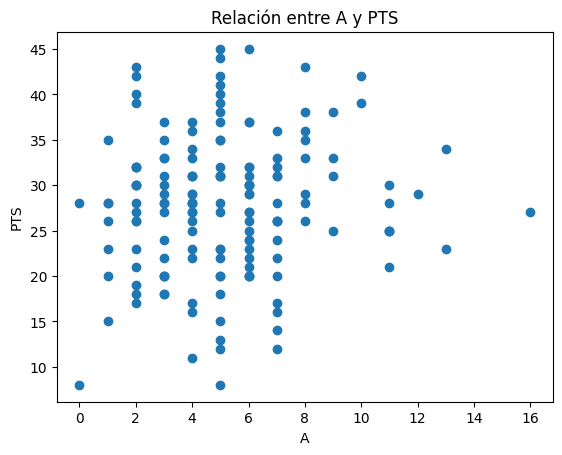

In [ ]:
correlation = df['A'].corr(df['PTS'], method='pearson')
print(f"Correlación de Pearson entre A y PTS: {correlation}")
# Crear el diagrama de dispersión
plt.scatter(df['A'], df['PTS'])

# Añadir etiquetas a los ejes
plt.xlabel('A')
plt.ylabel('PTS')

# Añadir un título al diagrama
plt.title('Relación entre A y PTS')

# Mostrar el diagrama
plt.show()

Además, si nos fijamos hay columnas que no están en formato entero y por tanto no podremos trabajar con ellas, para ello vamos a definir unas funciones que nos transformarán estas columnas en datos enteros y demás, preparando los datos para trabajar con ellos

# Funciones Auxiliares

In [ ]:
# Función para asignar los puntos
def asignar_puntos(row):
    # Limpiar el resultado y separar los puntos
    resultado_limpio = row['Resultado'].strip("[]'TE ")  # Eliminar los corchetes y comillas
    row['Estado'] = row['Estado'].strip("[]'TE ")

    # Split the 'resultado_limpio' by '-' and take only the first two elements
    puntos = resultado_limpio.split('-')[:2]

    # Handle cases where there are fewer than 2 elements after splitting
    if len(puntos) < 2:
        # You can either raise an error, skip the row, or assign default values
        # For example, assigning 0 to both scores:
        puntos1, puntos2 = 0, 0
    else:
        # Further split the second element by space in case of extra numbers
        puntos[1] = puntos[1].split()[0]  # Take the first part before the space

        #Convert to integers
        puntos1 = int(puntos[0])  # Puntos del equipo
        puntos2 = int(puntos[1])  # Puntos del rival

    if row['Estado'] == 'G':
        row['puntosEquipo'] = puntos1
        row['puntosRival'] = puntos2
    else:  # Perdido
        row['puntosEquipo'] = puntos2
        row['puntosRival'] = puntos1

    return row

# Función para asignar los puntos
def asignar_puntos_lanzamiento(row, lanzamiento):
    # Limpiar el resultado y separar los puntos
    puntos = row['FG'].split('-')

    puntos_anotados = int(puntos[0])  # Puntos del equipo
    puntos_intentados = int(puntos[1])    # Puntos del rival

    if lanzamiento == 'FG':
        row['FG_metidos'] = puntos_anotados
        row['FG_intentados'] = puntos_intentados
    elif lanzamiento == 'FT':
        row['FT_metidos'] = puntos_anotados
        row['FT_intentados'] = puntos_intentados
    else:
        row['3PT_metidos'] = puntos_anotados
        row['3PT_intentados'] = puntos_intentados

    return row

Ahora ya las podmeos aplicar para limpiar lo que decíamos

In [ ]:
df['puntosEquipo'] = 0
df['puntosRival'] = 0
# Aplicar la función al DataFrame
df = df.apply(asignar_puntos, axis=1)
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= 'FG')
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= '3PT')
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= 'FT')

In [ ]:
#Lo voy a mostrar a ver si se han creado las nuevas columnas
df

,Año,OP,Resultado,Estado,MIN,FG,FG%,3PT,3P%,FT,...,TO,PTS,puntosEquipo,puntosRival,FG_metidos,FG_intentados,3PT_metidos,3PT_intentados,FT_metidos,FT_intentados
0,2021,CLE,['123-109'],G,29,8-10,80.0,1-2,50.0,6-6,...,2.0,23.0,123,109,8,10,8,10,8,10
1,2021,SA,['128-116'],G,29,4-10,40.0,0-4,0.0,6-6,...,1.0,14.0,128,116,4,10,4,10,4,10
2,2021,DEN,['125-119'],G,41,9-14,64.3,3-6,50.0,12-13,...,5.0,33.0,125,119,9,14,9,14,9,14
3,2021,DAL,['113-109'],P,36,7-21,33.3,0-4,0.0,6-6,...,2.0,20.0,109,113,7,21,7,21,7,21
4,2021,MIL,['124-118'],P,40,11-22,50.0,4-8,50.0,6-7,...,3.0,32.0,118,124,11,22,11,22,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2024,SA,['132-121'],P,37,10-15,66.7,3-5,60.0,5-9,...,3.0,28.0,121,132,10,15,10,15,10,15
173,2024,SA,['115-114'],P,37,12-19,63.2,1-3,33.3,1-2,...,5.0,26.0,114,115,12,19,12,19,12,19
174,2024,UTAH,['126-104'],G,29,8-11,72.7,1-4,25.0,9-9,...,2.0,26.0,126,104,8,11,8,11,8,11
175,2024,LAL,['100-95'],P,39,14-28,50.0,1-5,20.0,10-13,...,8.0,39.0,95,100,14,28,14,28,14,28


Ahora también tendrmeos que pasar esas variables categóricas como la de OP a numéricas para que el modleo pueda usarlas en sus predicciones y aprendizaje

In [ ]:
df['OP'] = df['OP'].astype('category').cat.codes
df['Estado'] = df['Estado'].astype('category').cat.codes

In [ ]:
#Lo voy a mostrar para ver los cambios
df

,Año,OP,Resultado,Estado,MIN,FG,FG%,3PT,3P%,FT,...,TO,PTS,puntosEquipo,puntosRival,FG_metidos,FG_intentados,3PT_metidos,3PT_intentados,FT_metidos,FT_intentados
0,2021,5,['123-109'],0,29,8-10,80.0,1-2,50.0,6-6,...,2.0,23.0,123,109,8,10,8,10,8,10
1,2021,25,['128-116'],0,29,4-10,40.0,0-4,0.0,6-6,...,1.0,14.0,128,116,4,10,4,10,4,10
2,2021,7,['125-119'],0,41,9-14,64.3,3-6,50.0,12-13,...,5.0,33.0,125,119,9,14,9,14,9,14
3,2021,6,['113-109'],1,36,7-21,33.3,0-4,0.0,6-6,...,2.0,20.0,109,113,7,21,7,21,7,21
4,2021,16,['124-118'],1,40,11-22,50.0,4-8,50.0,6-7,...,3.0,32.0,118,124,11,22,11,22,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2024,25,['132-121'],1,37,10-15,66.7,3-5,60.0,5-9,...,3.0,28.0,121,132,10,15,10,15,10,15
173,2024,25,['115-114'],1,37,12-19,63.2,1-3,33.3,1-2,...,5.0,26.0,114,115,12,19,12,19,12,19
174,2024,28,['126-104'],0,29,8-11,72.7,1-4,25.0,9-9,...,2.0,26.0,126,104,8,11,8,11,8,11
175,2024,13,['100-95'],1,39,14-28,50.0,1-5,20.0,10-13,...,8.0,39.0,95,100,14,28,14,28,14,28


Recordar que categorizar la columna OP de esta manera puede llevar a fallos porque pensará que números mayores pueden tener más peso o que el orden es importante, lo ideal sería pasarlo a binario o usar otra técnica

Ahora vamos a seguir eligiendo qué datos son importantes a la hora de predecir los puntos d eun partido. En este caso par ano hacer un estudio variable a variable como el de A PTS que hicimos anteriormente, vamos a hacerlo a ojo a modo de ejemplo. Por ejemplo, podría ser interesante antes de un partido conocer la media de puntos, porcentajes, etc de los últimos 5 partidos. Se haría de la siguiente manera:

In [ ]:
# Promedio de puntos en los últimos 5, 10 y 25 partidos
for n in [5, 10, 25]:
    df[f'Avg_Points_Last_{n}'] = df['PTS'].rolling(window=n).mean()
    df[f'Avg_FT_Met_Last_{n}'] = df['FT_metidos'].rolling(window=n).mean()
    df[f'Avg_3PT_Met_Last_{n}'] = df['3PT_metidos'].rolling(window=n).mean()
    df[f'Avg_FG_Met_Last_{n}'] = df['FG_metidos'].rolling(window=n).mean()
    df[f'Avg_FT_Int_Last_{n}'] = df['FT_intentados'].rolling(window=n).mean()
    df[f'Avg_3PT_Int_Last_{n}'] = df['3PT_intentados'].rolling(window=n).mean()
    df[f'Avg_FG_Int_Last_{n}'] = df['FG_intentados'].rolling(window=n).mean()
    df[f'Avg_punt_equipo_Last_{n}'] = df['puntosEquipo'].rolling(window=n).mean()
    df[f'Avg_punt_rival_Last_{n}'] = df['puntosRival'].rolling(window=n).mean()

df = df.drop(columns=['Resultado','FG','3PT','FT','puntosEquipo', 'puntosRival','FG_intentados','FT_intentados','3PT_intentados', 'FG_metidos', 'FT_metidos', '3PT_metidos'])#Eliminamos estas columnas a ojo sin realmente saber si hay alguna relación entre ellas y los puntos que mete en el siguiente partido
# Only calculate the mean for numeric columns
numeric_df = df.select_dtypes(include=['number'])
df[numeric_df.columns] = numeric_df.fillna(numeric_df.mean()).round(1)
#The previous line fills the NaN values of only the numerical columns using the mean of those columns and rounds them to 1 decimal place

In [ ]:
df

,Año,OP,Estado,MIN,FG%,3P%,FT%,R,A,BLK,...,Avg_punt_rival_Last_10,Avg_Points_Last_25,Avg_FT_Met_Last_25,Avg_3PT_Met_Last_25,Avg_FG_Met_Last_25,Avg_FT_Int_Last_25,Avg_3PT_Int_Last_25,Avg_FG_Int_Last_25,Avg_punt_equipo_Last_25,Avg_punt_rival_Last_25
0,2021,5,0,29,80.0,50.0,100.0,8.0,13.0,0.0,...,113.1,27.7,10.0,10.0,10.0,18.6,18.6,18.6,116.6,112.7
1,2021,25,0,29,40.0,0.0,100.0,7.0,7.0,3.0,...,113.1,27.7,10.0,10.0,10.0,18.6,18.6,18.6,116.6,112.7
2,2021,7,0,41,64.3,50.0,92.3,11.0,7.0,2.0,...,113.1,27.7,10.0,10.0,10.0,18.6,18.6,18.6,116.6,112.7
3,2021,6,1,36,33.3,0.0,100.0,9.0,3.0,1.0,...,113.1,27.7,10.0,10.0,10.0,18.6,18.6,18.6,116.6,112.7
4,2021,16,1,40,50.0,50.0,85.7,9.0,6.0,2.0,...,113.1,27.7,10.0,10.0,10.0,18.6,18.6,18.6,116.6,112.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2024,25,1,37,66.7,60.0,55.6,6.0,1.0,2.0,...,118.5,30.0,10.4,10.4,10.4,19.8,19.8,19.8,116.6,117.0
173,2024,25,1,37,63.2,33.3,50.0,2.0,7.0,0.0,...,119.3,30.1,10.4,10.4,10.4,19.6,19.6,19.6,116.6,116.8
174,2024,28,0,29,72.7,25.0,100.0,4.0,7.0,1.0,...,116.0,29.9,10.3,10.3,10.3,19.2,19.2,19.2,117.1,116.7
175,2024,13,1,39,50.0,20.0,76.9,11.0,2.0,1.0,...,113.2,30.6,10.5,10.5,10.5,19.9,19.9,19.9,115.6,115.9


Podemos también normalizar las variables de tipo porcentaje

In [ ]:
df['FG%'] = pd.to_numeric(df['FG%'], errors='coerce')

In [ ]:
df['FG%'] = (df['FG%'] / 100).round(2)

In [ ]:
df['3P%'] = pd.to_numeric(df['3P%'], errors='coerce')
df['3P%'] = (df['3P%'] / 100).round(2)
df['FT%'] = pd.to_numeric(df['FT%'], errors='coerce')
df['FT%'] = (df['FT%'] / 100).round(2)

Ahora hacemos la diferenciación entre las variables predictoras x y la variable objetivo y que es la de PTS

In [ ]:
X=df.loc[:,df.columns!='PTS']
y=df['PTS']

**Preparamos los datos para entrenamiento haciendo ya el DataSet_Train y el DataSet_Test 20%**

In [ ]:
from sklearn.model_selection import train_test_split

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construcción del Modelo

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Evaluación del Modelo

Usamos los datos de test que eran el 20% que dividimos anteriormente

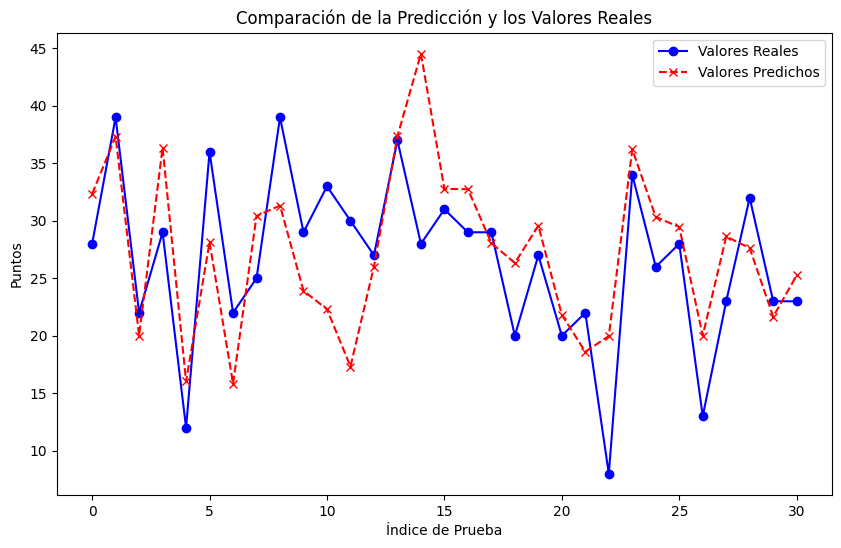

In [ ]:
# Predicción
y_pred = model.predict(X_test)

# Gráfico de comparación entre los valores reales y predichos
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_test.values, label='Valores Reales', color='b', marker='o')

# Graficar los valores predichos
plt.plot(y_pred, label='Valores Predichos', color='r', linestyle='--', marker='x')

# Añadir título y etiquetas
plt.title('Comparación de la Predicción y los Valores Reales')
plt.xlabel('Índice de Prueba')
plt.ylabel('Puntos')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Evaluación
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 39.1879077486543
R2 Score: 0.2526674998718689


In [ ]:
# Crear un DataFrame con los valores reales, predichos y la diferencia
resultados_df = pd.DataFrame({
    'Valor Real': y_test,
    'Valor Predicho': y_pred,
    'Diferencia': y_test - y_pred
})

# Mostrar las primeras filas del DataFrame
print(resultados_df.head(20))

     Valor Real  Valor Predicho  Diferencia
96         28.0       32.337519   -4.337519
163        39.0       37.331163    1.668837
34         22.0       20.009575    1.990425
32         29.0       36.359070   -7.359070
137        12.0       16.029753   -4.029753
71         36.0       28.137504    7.862496
109        22.0       15.836069    6.163931
168        25.0       30.413374   -5.413374
175        39.0       31.326519    7.673481
79         29.0       23.911792    5.088208
51         33.0       22.306872   10.693128
158        30.0       17.323661   12.676339
90         27.0       26.018949    0.981051
87         37.0       37.346202   -0.346202
16         28.0       44.531458  -16.531458
21         31.0       32.766583   -1.766583
33         29.0       32.750814   -3.750814
106        29.0       28.062354    0.937646
136        20.0       26.328384   -6.328384
157        27.0       29.577776   -2.577776


Para ver los pesos de cada variable

In [ ]:
# Obtener los coeficientes de las variables
coeficientes = model.coef_

# Mostrar las columnas con sus respectivos coeficientes
variables_influencia = pd.DataFrame({'Variable': X.columns, 'Coeficiente': coeficientes})

# Ordenar las variables por la magnitud de su coeficiente
variables_influencia = variables_influencia.reindex(variables_influencia.Coeficiente.abs().sort_values(ascending=False).index)

# Mostrar las variables con mayor influencia
print(variables_influencia)

                   Variable  Coeficiente
4                       FG%    29.426129
6                       FT%     5.202894
5                       3P%     4.208597
9                       BLK    -1.172712
15       Avg_3PT_Met_Last_5    -1.171064
14        Avg_FT_Met_Last_5    -1.171064
16        Avg_FG_Met_Last_5    -1.171064
24      Avg_3PT_Met_Last_10     0.897657
25       Avg_FG_Met_Last_10     0.897657
23       Avg_FT_Met_Last_10     0.897657
13        Avg_Points_Last_5     0.883470
3                       MIN     0.620999
2                    Estado     0.605985
28       Avg_FG_Int_Last_10    -0.506446
27      Avg_3PT_Int_Last_10    -0.506446
26       Avg_FT_Int_Last_10    -0.506446
0                       Año    -0.462521
36      Avg_3PT_Int_Last_25     0.458469
35       Avg_FT_Int_Last_25     0.458469
37       Avg_FG_Int_Last_25     0.458469
34       Avg_FG_Met_Last_25     0.434566
33      Avg_3PT_Met_Last_25     0.434566
32       Avg_FT_Met_Last_25     0.434566
18       Avg_3PT

Vemos que no tiene sentido que sepa ya el porcentaje de acierto de tiros de ese partido, fallo mío, habría que quitárselo, por eso es importante elegir bien los datos

Así que voy a limpiar el dataset y volver a dividir los datos en  train y test para luego construr y evaluar el modelo

In [ ]:
df = df.drop(columns=['FG%','3P%','FT%'])


In [ ]:
X1=df.loc[:,df.columns!='PTS']
y1=df['PTS']

In [ ]:
from sklearn.model_selection import train_test_split

# División de datos
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train1,y_train1)

LinearRegression()

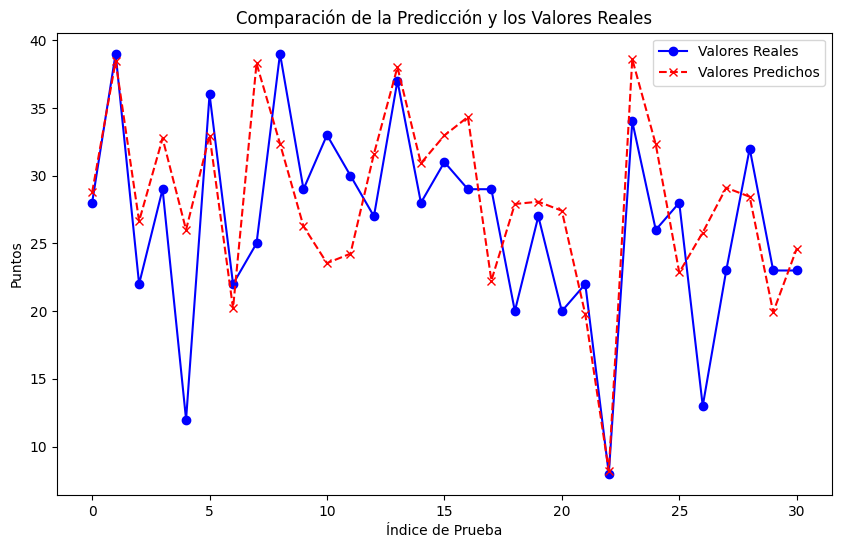

In [ ]:
# Predicción
y_pred1 = model1.predict(X_test1)

# Gráfico de comparación entre los valores reales y predichos
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_test1.values, label='Valores Reales', color='b', marker='o')

# Graficar los valores predichos
plt.plot(y_pred1, label='Valores Predichos', color='r', linestyle='--', marker='x')

# Añadir título y etiquetas
plt.title('Comparación de la Predicción y los Valores Reales')
plt.xlabel('Índice de Prueba')
plt.ylabel('Puntos')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener los coeficientes de las variables
coeficientes = model1.coef_

# Use X_train1.columns instead of X.columns
# Assuming X_train1 contains the features actually used to train the model
variables_influencia = pd.DataFrame({'Variable': X_train1.columns, 'Coeficiente': coeficientes})

# Ordenar las variables por la magnitud de su coeficiente
variables_influencia = variables_influencia.reindex(variables_influencia.Coeficiente.abs().sort_values(ascending=False).index)

# Mostrar las variables con mayor influencia
print(variables_influencia)

                   Variable  Coeficiente
2                    Estado    -1.739916
29       Avg_FT_Met_Last_25     1.545993
30      Avg_3PT_Met_Last_25     1.545993
31       Avg_FG_Met_Last_25     1.545993
6                       BLK    -1.227904
22       Avg_FG_Met_Last_10     1.142878
20       Avg_FT_Met_Last_10     1.142878
21      Avg_3PT_Met_Last_10     1.142878
10        Avg_Points_Last_5     0.969165
13        Avg_FG_Met_Last_5    -0.876672
11        Avg_FT_Met_Last_5    -0.876672
12       Avg_3PT_Met_Last_5    -0.876672
35  Avg_punt_equipo_Last_25    -0.871619
36   Avg_punt_rival_Last_25     0.868412
26  Avg_punt_equipo_Last_10     0.620963
7                       STL     0.608530
32       Avg_FT_Int_Last_25    -0.593895
33      Avg_3PT_Int_Last_25    -0.593895
34       Avg_FG_Int_Last_25    -0.593895
9                        TO     0.547955
3                       MIN     0.520992
27   Avg_punt_rival_Last_10    -0.507786
0                       Año    -0.463995
8               

Aquí lo interesante es ponerle variables en las filas de cada partido con respecto al partido anterior porque a lo mejor sí influye exactamente los puntos que ha metido (es parecido al porcentaje ypuntos de media que hemos añadido). También podría ser bueno poner variables con respeco al equipo rival: puntos concedidos por partido o así

# Guardamos el modelo

Necesario para guardar modelos de scikitlearn

In [ ]:
!pip install joblib

In [ ]:
import joblib

# Save the model
filename = 'linear_regression_model_kd_points.sav'
joblib.dump(model1, filename)

['linear_regression_model_kd_points.sav']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import joblib

# Ruta específica dentro de tu Drive: 'colab notebooks/Models/'
ruta_modelo = '/content/drive/My Drive/Colab Notebooks/Models/linear_regression_model_KD_points.sav'

# Guarda el modelo
joblib.dump(model1, ruta_modelo)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/My Drive/Colab Notebooks/Models/linear_regression_model_KD_points.sav']

In [ ]:
df

,Año,OP,Estado,MIN,R,A,BLK,STL,PF,TO,...,Avg_punt_rival_Last_10,Avg_Points_Last_25,Avg_FT_Met_Last_25,Avg_3PT_Met_Last_25,Avg_FG_Met_Last_25,Avg_FT_Int_Last_25,Avg_3PT_Int_Last_25,Avg_FG_Int_Last_25,Avg_punt_equipo_Last_25,Avg_punt_rival_Last_25
0,2021,5,0,29,8.0,13.0,0.0,0.0,2.0,2.0,...,113.1,27.7,10.0,10.0,10.0,18.6,18.6,18.6,116.6,112.7
1,2021,25,0,29,7.0,7.0,3.0,0.0,0.0,1.0,...,113.1,27.7,10.0,10.0,10.0,18.6,18.6,18.6,116.6,112.7
2,2021,7,0,41,11.0,7.0,2.0,2.0,1.0,5.0,...,113.1,27.7,10.0,10.0,10.0,18.6,18.6,18.6,116.6,112.7
3,2021,6,1,36,9.0,3.0,1.0,1.0,4.0,2.0,...,113.1,27.7,10.0,10.0,10.0,18.6,18.6,18.6,116.6,112.7
4,2021,16,1,40,9.0,6.0,2.0,1.0,4.0,3.0,...,113.1,27.7,10.0,10.0,10.0,18.6,18.6,18.6,116.6,112.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2024,25,1,37,6.0,1.0,2.0,0.0,3.0,3.0,...,118.5,30.0,10.4,10.4,10.4,19.8,19.8,19.8,116.6,117.0
173,2024,25,1,37,2.0,7.0,0.0,2.0,0.0,5.0,...,119.3,30.1,10.4,10.4,10.4,19.6,19.6,19.6,116.6,116.8
174,2024,28,0,29,4.0,7.0,1.0,1.0,1.0,2.0,...,116.0,29.9,10.3,10.3,10.3,19.2,19.2,19.2,117.1,116.7
175,2024,13,1,39,11.0,2.0,1.0,1.0,2.0,8.0,...,113.2,30.6,10.5,10.5,10.5,19.9,19.9,19.9,115.6,115.9
